In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt

In [152]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = num_words)

In [153]:
max_length =500

x_train = pad_sequences(x_train, maxlen= max_length)
x_test = pad_sequences(x_test, maxlen= max_length)

In [154]:
num_classes = np.max(y_train) + 1
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [155]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape= (max_length,)))
#model.add(Dense(128, activation = 'relu'))
#model.add(Dense(256, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [156]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics =['accuracy'])

In [157]:
history = model.fit(x_train, y_train, batch_size=64, epochs =10,
                   validation_split=0.2)

Epoch 1/10
113/113 [==============================] - 1s 6ms/step - loss: 414.5238 - accuracy: 0.1921 - val_loss: 77.3043 - val_accuracy: 0.2154
Epoch 2/10
113/113 [==============================] - 0s 4ms/step - loss: 37.9345 - accuracy: 0.2303 - val_loss: 21.2959 - val_accuracy: 0.2482
Epoch 3/10
113/113 [==============================] - 1s 5ms/step - loss: 12.5999 - accuracy: 0.2718 - val_loss: 12.0699 - val_accuracy: 0.2654
Epoch 4/10
113/113 [==============================] - 0s 4ms/step - loss: 7.0906 - accuracy: 0.3006 - val_loss: 8.9544 - val_accuracy: 0.2821
Epoch 5/10
113/113 [==============================] - 0s 4ms/step - loss: 5.0372 - accuracy: 0.3125 - val_loss: 7.7049 - val_accuracy: 0.2944
Epoch 6/10
113/113 [==============================] - 0s 3ms/step - loss: 4.0730 - accuracy: 0.3279 - val_loss: 6.8036 - val_accuracy: 0.3022
Epoch 7/10
113/113 [==============================] - 0s 4ms/step - loss: 3.5343 - accuracy: 0.3383 - val_loss: 6.2824 - val_accuracy: 0.3072

In [158]:
score = model.evaluate(x_test, y_test, verbose=0)

In [159]:
score

[5.925621509552002, 0.3210151493549347]

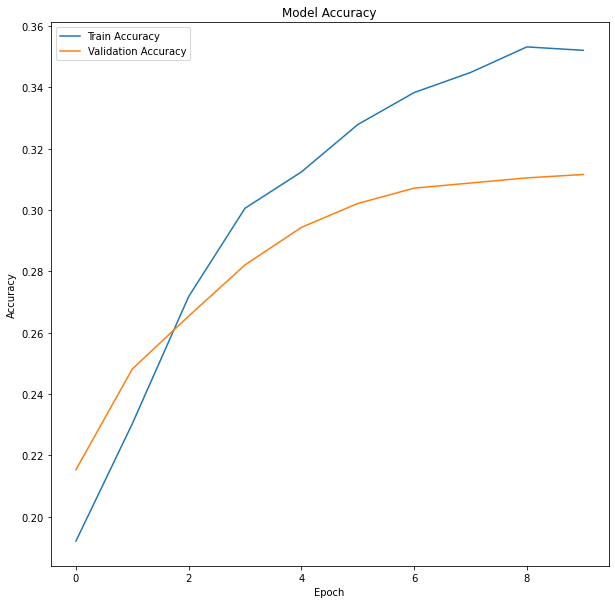

In [160]:
plt.figure(figsize=(10,10))
plt.plot(history.history['accuracy'], label ='Train Accuracy')
plt.plot(history.history['val_accuracy'], label ="Validation Accuracy" )
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()